<a href="https://colab.research.google.com/github/annykay/NoiseInDataImpact/blob/main/MLbasedImputation/MissingFeaturesAndImputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X = pd.read_csv('stellar_features.csv', index_col = 0)
y = pd.read_csv('stellar_labels.csv', index_col = 0)

tree = DecisionTreeClassifier(random_state=0, max_depth = 9)
forst = RandomForestClassifier(random_state=0, max_depth= 14,  n_estimators = 90)
knn = KNeighborsClassifier(n_neighbors = 3)
xgvClf = xgb.XGBClassifier(random_state=0, learning_rate=0.1, max_depth = 12, n_estimators=100)
logReg = LogisticRegression(random_state=0, C=2010)

clfs = [tree,
        forst, 
        knn,
        xgvClf,
        logReg
       ]
def Scores(clfs, X_train, X_test, y_train, y_test):
    
    train_scores = []
    test_scores = []
    importances = []
    for reg in clfs:

        reg.fit(X_train, y_train)
        y_train_pred = reg.predict(X_train)

        y_test_pred = reg.predict(X_test)
        train_score = round(f1_score(y_train, y_train_pred, average='micro'), 2)
        test_score = round(f1_score(y_test, y_test_pred, average='micro'), 2)

        train_scores.append(train_score)
        test_scores.append(test_score)

    return train_scores, test_scores

def corupt_data(n, X, y, clfs, est):
    Train_Scores = []
    Test_Scores = []
    for i in range(n):
        level = i/n
        print(level)
        D = X.copy()
        imp = IterativeImputer(estimator = est, max_iter=3, random_state=0)
        mask = np.random.binomial(1, level, size=(D.shape[0],D.shape[1])).astype(bool)
        D[mask] = np.nan
        X_train, X_test, y_train, y_test = train_test_split(
             D, y, test_size=0.7, random_state=0)
    
        imp.fit(X_train)
        X_train = imp.transform(X_train)
        X_test = imp.transform(X_test)
    
        scores = Scores(clfs, X_train, X_test, y_train, y_test)
        print(scores)
    
        Train_Scores.append(scores[0])
        Test_Scores.append(scores[1])
        
    return (Train_Scores, Test_Scores)
    
stellar_train_lr, stellar_test_lr = corupt_data(20, X, y, clfs, est = None)

In [ ]:
pd.DataFrame(stellar_train_lr).to_csv('StellarF1TrainScores.csv', index = False)
pd.DataFrame(stellar_test_lr).to_csv('StellarF1TestScores.csv', index = False)

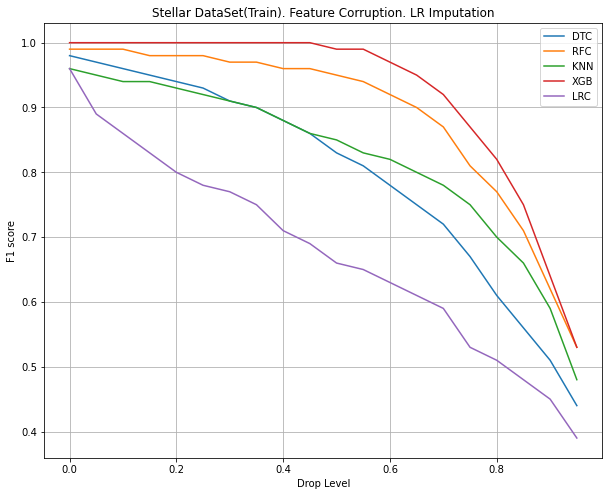

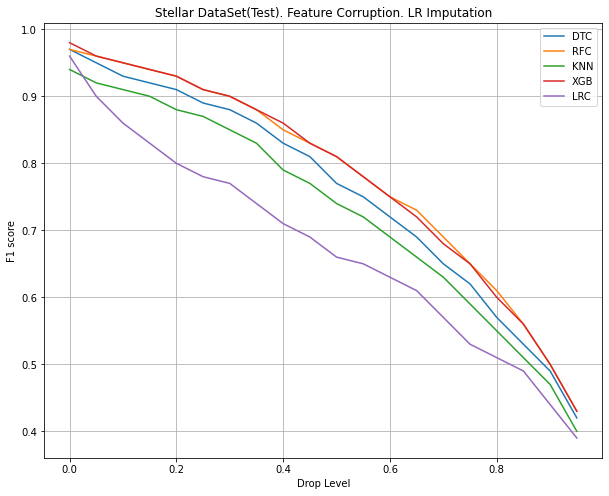

In [ ]:
plot_results(stellar_train_lr, 'Stellar', 'LR', test = False)
plot_results(stellar_test_lr, 'Stellar', 'LR', test = True)

In [ ]:
stellar_train_dt, stellar_test_dt = corupt_data(20, X, y, clfs, est = DecisionTreeRegressor())

In [ ]:
pd.DataFrame(stellar_train_dt).to_csv('StellarF1TrainScoresDT.csv', index = False)
pd.DataFrame(stellar_test_dt).to_csv('StellarF1TestScoresDT.csv', index = False)

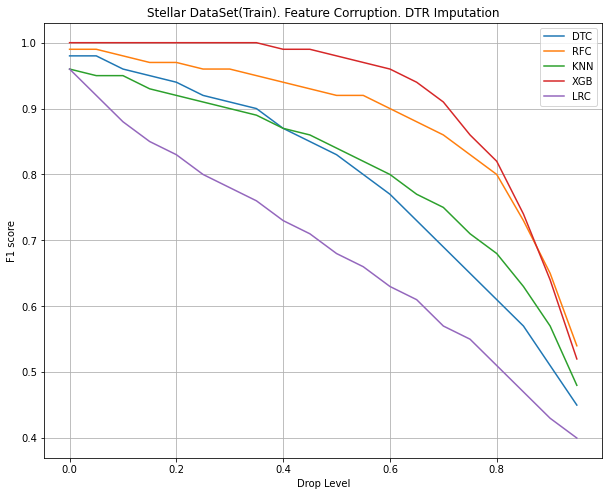

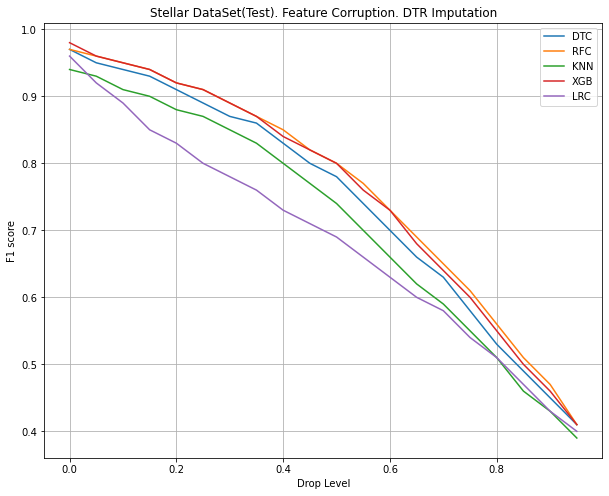

In [ ]:
plot_results(stellar_train_dt, 'Stellar', 'DTR', test = False)
plot_results(stellar_test_dt, 'Stellar', 'DTR', test = True)

In [ ]:

stellar_train_knn, stellar_test_knn = corupt_data(20, X, y, clfs, est = KNeighborsRegressor())

In [ ]:
pd.DataFrame(stellar_train_knn).to_csv('StellarF1TrainScoresKNN.csv', index = False)
pd.DataFrame(stellar_test_knn).to_csv('StellarF1TestScoresKNN.csv', index = False)

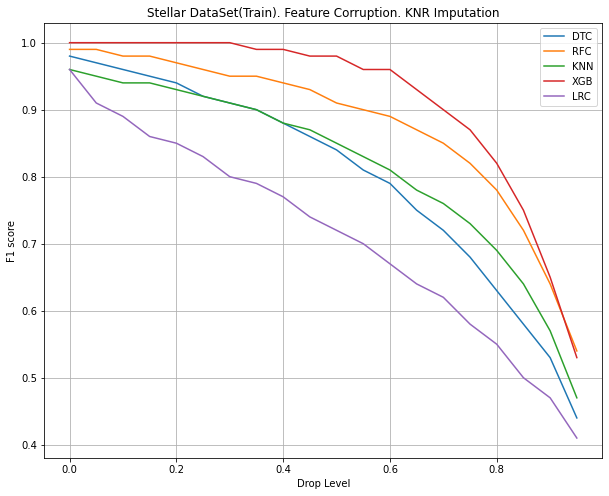

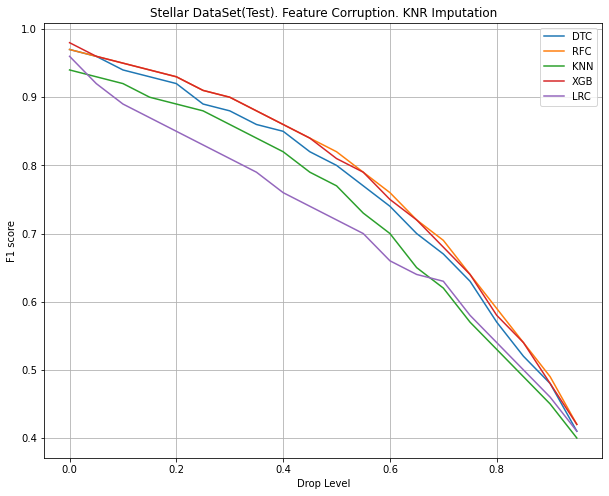

In [ ]:
plot_results(stellar_train_knn, 'Stellar', 'KNR', test = False)
plot_results(stellar_test_knn, 'Stellar', 'KNR', test = True)

In [ ]:
stellar_train_extra, stellar_test_extra = corupt_data(20, X, y, clfs, est = ExtraTreesRegressor())

In [ ]:
pd.DataFrame(stellar_train_extra).to_csv('StellarF1TrainScoresExtra.csv', index = False)
pd.DataFrame(stellar_test_extra).to_csv('StellarF1TestScoresExtra.csv', index = False)

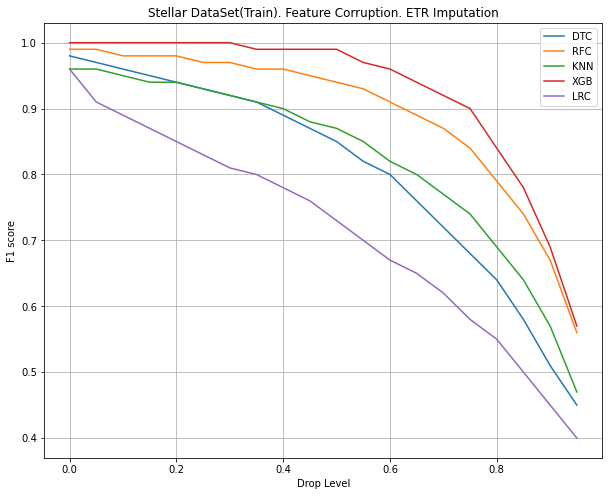

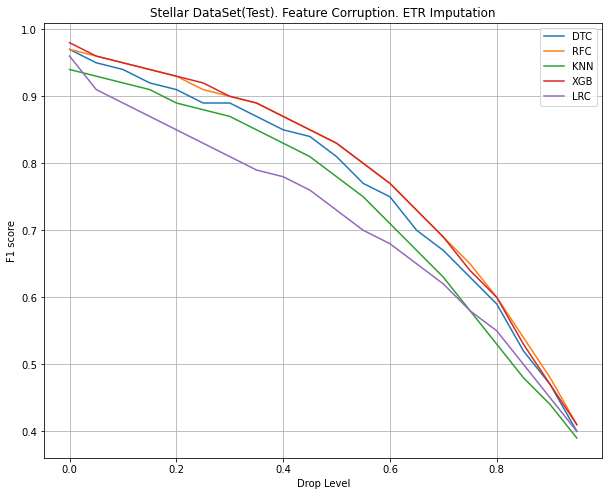

In [ ]:
plot_results(stellar_train_extra, 'Stellar', 'ETR', test = False)
plot_results(stellar_test_extra, 'Stellar', 'ETR', test = True)

In [ ]:
def plot_all_results(result_lr, result_dt, result_knn, result_extra, dataset, test = True):
    plt.figure(figsize=(10,8))
    imps = ['LR', 'RFR', 'KNR', 'ETR']
    styles = ['-', '--', ':', '-.']
    for result, imp, st in zip([result_lr, result_dt, result_knn, result_extra], imps,styles):
        plt.plot([i/20 for i in range(20)], np.array(result)[:,0], color = 'b', 
                 linestyle = st, label = 'DTC, {} Imputation'.format(imp))
        plt.plot([i/20 for i in range(20)], np.array(result)[:,1], color = 'y', 
                 linestyle = st, label = 'RFC, {} Imputation'.format(imp))
        plt.plot([i/20 for i in range(20)], np.array(result)[:,2], color = 'g', 
                 linestyle = st, label = 'KNN, {} Imputation'.format(imp))
        plt.plot([i/20 for i in range(20)], np.array(result)[:,3], color = 'r',
                 linestyle = st, label = 'XGB, {} Imputation'.format(imp))
        plt.plot([i/20 for i in range(20)], np.array(result)[:,4], color = 'm', 
                 linestyle = st, label = 'LRC, {} Imputation'.format(imp))
    if test:
        plt.title('{} DataSet(Test). Features Corruption'.format(dataset))
    else:
        plt.title('{} DataSet(Train). Features Corruption'.format(dataset))
    plt.xlabel('Drop Level')
    plt.ylabel('F1 score')
    plt.grid()
    plt.legend()
    


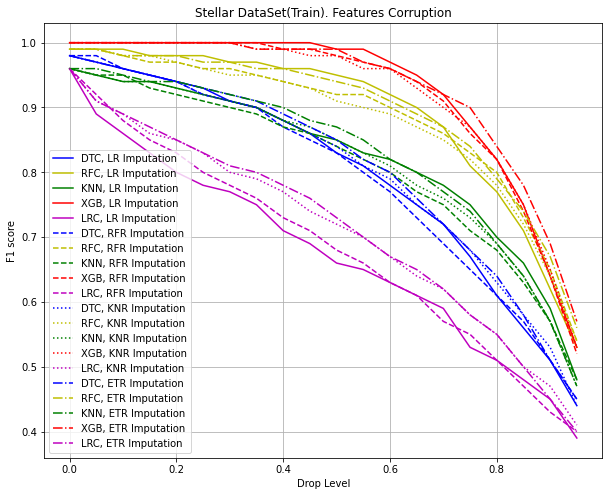

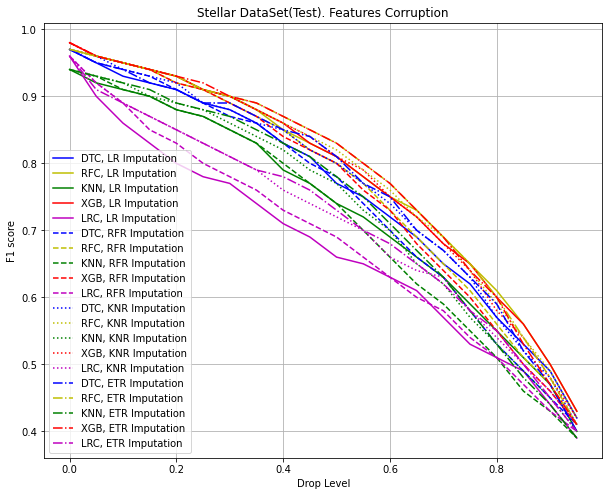

In [ ]:
plot_all_results(stellar_train_lr, stellar_train_dt, stellar_train_knn, stellar_train_extra, 'Stellar', test= False)
plot_all_results(stellar_test_lr, stellar_test_dt, stellar_test_knn, stellar_test_extra, 'Stellar', test= True)

In [ ]:
def calc_perf(scores_train, scores_test, n ):
    Performances_train = []
    Performances_test = []
    for i in scores_train:
        
        Performances_train.append(np.sum(i, axis = 0) * 1/n)
    
    for i in scores_test:

        Performances_test.append(np.sum(i, axis = 0) * 1/n)
    return Performances_train, Performances_test

In [ ]:
scores_train_stellar = [stellar_train_lr, stellar_train_dt, stellar_train_knn, stellar_train_extra]
scores_test_stellar = [stellar_test_lr, stellar_test_dt, stellar_test_knn, stellar_test_extra]
perf_train_stellar, perf_test_stellar = calc_perf(scores_train_stellar, scores_test_stellar, 20)

In [ ]:
perf_test_stellar


[array([0.758 , 0.7815, 0.731 , 0.781 , 0.676 ]),
 array([0.746 , 0.764 , 0.7165, 0.7605, 0.687 ]),
 array([0.7655, 0.78  , 0.734 , 0.778 , 0.713 ]),
 array([0.767 , 0.7835, 0.7395, 0.783 , 0.7155])]

In [ ]:
def calc_stab(scores_train, scores_test, n ):
    Stability_train = []
    Stability_test = []
    for i in scores_train:
        Stability_train.append(np.sum(i, axis = 0)/np.array(i[0])/n)
    
    for i in scores_test:

        Stability_test.append(np.sum(i, axis = 0)/np.array(i[0])/n)
    return Stability_train, Stability_test
stab_train_stellar, stab_test_stellar = calc_stab(scores_train_stellar, scores_test_stellar, 20)
# stab_train_rice, stab_test_rice = calc_stab(scores_train_rice, scores_test_rice, 20)
# stab_train_bank, stab_test_bank = calc_stab(scores_train_bank, scores_test_bank, 20)
# stab_train_pulsar, stab_test_pulsar = calc_stab(scores_train_pulsar, scores_test_pulsar, 20)


In [ ]:
labs = ['DTC', 'RFC', 'KNC', 'XGB', 'LRC']

([<matplotlib.axis.XTick at 0x7f6ad255d7c0>,
 [Text(0, 0, 'LR'), Text(1, 0, 'DTR'), Text(2, 0, 'KNR'), Text(3, 0, 'ETR')])

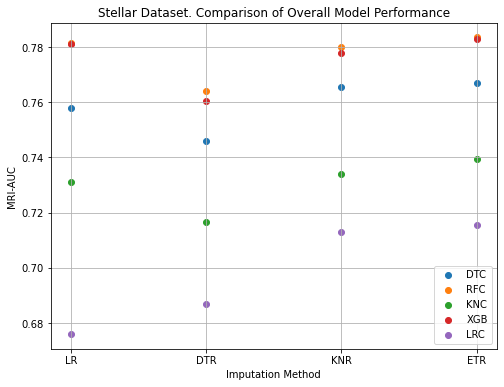

In [ ]:
plt.figure(figsize=(8,6))
for i, j  in zip(np.array(perf_test_stellar).T, labs):
    plt.scatter(np.arange(4), i, label = j)
plt.legend()
plt.ylabel('MRI-AUC')
plt.xlabel('Imputation Method')
plt.grid()
plt.title('Stellar Dataset. Comparison of Overall Model Performance')
plt.xticks([0, 1, 2, 3],['LR', 'DTR', 'KNR', 'ETR'] )

([<matplotlib.axis.XTick at 0x7f6ad25f45b0>,
 [Text(0, 0, 'LR'), Text(1, 0, 'DTR'), Text(2, 0, 'KNR'), Text(3, 0, 'ETR')])

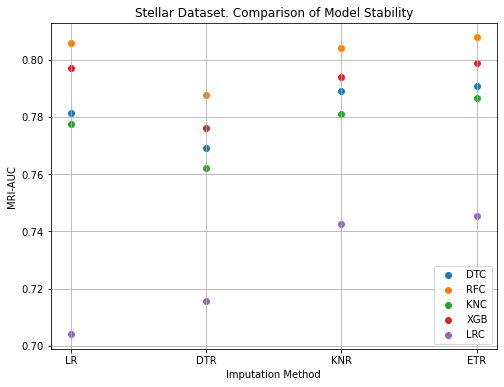

In [ ]:
plt.figure(figsize=(8,6))
for i, j  in zip(np.array(stab_test_stellar).T, labs):
    plt.scatter(np.arange(4), i, label = j)
plt.legend()
plt.ylabel('MRI-AUC')
plt.xlabel('Imputation Method')
plt.grid()
# plt.ylim(0.945,0.96)
plt.title('Stellar Dataset. Comparison of Model Stability')
plt.xticks([0, 1, 2, 3],['LR', 'DTR', 'KNR', 'ETR'] )